<a href="https://colab.research.google.com/github/Afzaal-Ijaz/Regression_Problems/blob/main/House_Rent_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/content/drive/MyDrive/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
df.isna().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


In [4]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [5]:
df = df[['BHK','Rent', 'Size', 'Area Type','Area Locality', 'City', 'Furnishing Status','Bathroom']]

In [6]:
df.head(5)


,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,1
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,1
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,1
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Area Type          4746 non-null   object
 4   Area Locality      4746 non-null   object
 5   City               4746 non-null   object
 6   Furnishing Status  4746 non-null   object
 7   Bathroom           4746 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 296.8+ KB


In [8]:
df['Bathroom'] = df['Bathroom'].astype(dtype=np.int8)

In [9]:
df['BHK'] = df['BHK'].astype(dtype=np.int8)

In [10]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4741,False
4742,False
4743,False
4744,False


In [11]:
df.shape

(4746, 8)

<Axes: ylabel='Rent'>

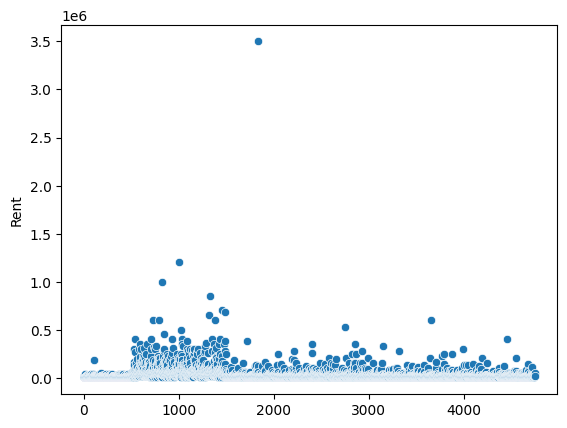

In [12]:
sns.scatterplot(df['Rent'])

In [13]:
backup = df

In [14]:
df['Area Locality'].value_counts()

,count
Area Locality,
Bandra West,37
Gachibowli,29
Electronic City,24
"Miyapur, NH 9",22
Velachery,22
...,...
Hoysala Nagar,1
Nagarabhavi,1
"Shamanna Garden, Wilson Garden",1


In [15]:
categorical_features = ['Area Type','Area Locality', 'City', 'Furnishing Status']

In [16]:
def data_encoding(x):
  le = LabelEncoder()
  x = le.fit_transform(df[x])
  return x

In [17]:
df[categorical_features]= df[categorical_features].apply(lambda x: LabelEncoder().fit_transform(x))

In [18]:
df

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom
0,2,10000,1100,2,221,4,2,2
1,2,20000,800,2,1527,4,1,1
2,2,17000,1000,2,1760,4,1,1
3,2,10000,800,2,526,4,2,1
4,2,7500,850,1,1890,4,2,1
...,...,...,...,...,...,...,...,...
4741,2,15000,1000,1,219,3,1,2
4742,3,29000,2000,2,1214,3,1,3
4743,3,35000,1750,1,724,3,1,3
4744,3,45000,1500,1,590,3,1,2


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Rent'] =  scaler.fit_transform(df[['Rent']])


In [20]:
from sklearn.model_selection import train_test_split
X = df.drop('Rent',axis=1)
y = df['Rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [22]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [23]:
pred = model1.predict(X_test)
print(r2_score(y_test,pred))

0.4357176420475676


In [32]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train,y_train)
pred = model2.predict(X_test)
print(r2_score(y_test,pred))
print('MAE of model1:',round(mean_absolute_error(y_test,pred), 2))

0.4766851230044835
MAE of model1: 0.2


In [33]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)
pred = model3.predict(X_test)
print(r2_score(y_test,pred))
print('MAE of model2:',round(mean_absolute_error(y_test,pred), 2))

0.6180667440958248
MAE of model2: 0.18


In [34]:
from sklearn.ensemble import GradientBoostingRegressor
model4 = GradientBoostingRegressor()
model4.fit(X_train,y_train)
pred = model4.predict(X_test)
print(r2_score(y_test,pred))
print('MAE of model3:',round(mean_absolute_error(y_test,pred), 2))

0.6306893749723224
MAE of model3: 0.18
